# Time-extended state space tutorial

This tutorial is not finished. Here's a skeleton.

In [1]:
using LinearAlgebra, ApproxFun, Plots, LaTeXStrings

As in a previous [tutorial](https://github.com/mjyshin/math-tutorials/blob/main/operator_exponential.ipynb), we want to solve the heat equation with left Dirichlet and right Neumann BCs:

$$
\begin{align*}
\frac{\partial u}{\partial t}(x,t) &= D\Delta u(x,t),\quad x\in X\setminus\partial X\\
u(x,t_0) &=: u_0(x)\\
u(x_l,t) &=: f(t) = u_0(x_l)\\
\frac{\partial u}{\partial x}(x_r,t) &=: g(t) = \frac{\text{d}u_0}{\text{d}x}(x_r).
\end{align*}\label{eq:heat}\tag{1}
$$

We can extend the state space from $X:=[x_l,x_r]=[0,1]$ to $\Omega:=X\times T$, where $T:=[t_0,t_f]=[0,0.1]$ is the time domain.

In [2]:
xl,xr = 0,1
t0,tf = 0,0.1
X = Chebyshev(xl..xr)
T = Chebyshev(t0..tf)
Ω = X*T

Chebyshev(0..1)⊗Chebyshev(0.0..0.1)

We can reformulate Eq. ([1](#mjx-eqn-eq:heat)) as

$$
\left(\frac{\partial}{\partial t} - D\Delta\right)u(x,t) = 0,\quad (x,t)\in \Omega\setminus\partial\Omega,\label{eq:extheat}\tag{2}
$$

where $L:=D_t - D\Delta$, and $\Delta$ is the Laplacian operator $D_{xx}$.

In [3]:
θ = (D=1,)
Dx = Derivative(Ω,[1,0])
Dt = Derivative(Ω,[0,1])
Δ = Dx^2
L = Dt - θ.D*Δ

PlusOperator : Chebyshev(0..1)⊗Chebyshev(0.0..0.1) → Ultraspherical(2,0..1)⊗Ultraspherical(1,0.0..0.1)
 0.0  20.0  0.0   0.0  0.0  -16.0   0.0   0.0  -13.333333333333332    0.0  ⋯
 0.0   0.0  0.0  40.0  0.0    0.0   0.0   0.0   -8.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  5.0    0.0   0.0   0.0    0.0                -24.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0  60.0   0.0    0.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0  10.0    0.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0   0.0    3.333333333333333    0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0                  0.0  ⋱
 0.0   0.0  0.0   0.0  0.0    0.0   0.0   0.0    0.0                  0.0  ⋱
  ⋮     ⋱    ⋱     ⋱    ⋱      ⋱     ⋱     ⋱      ⋱                    ⋱   ⋱

The rounded $\text{rect}$ initial condition doesn't work (it runs for a prohibitively long time). So we'll use a sinusoid:

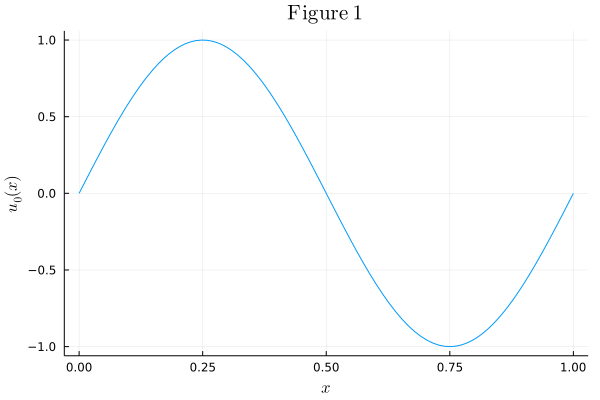

In [4]:
u0 = Fun(x->sin(2π*x),X)

fig1 = plot(u0,xlabel=L"x",ylabel=L"u_0(x)",title=L"\textrm{Figure\ 1}",legend=false,fmt=:png)
display(fig1)

While the spatial BCs are (fairly) self-explanatory, the novelty here is that we can think of the initial condition as another left Dirichlet BC, this time on the time domain. (Need to learn more about the direct products here...)

In [5]:
B = [I ⊗ ldirichlet(T);    # IC
     ldirichlet(X) ⊗ I;    # left BC
     rneumann(X) ⊗ I]    # right BC

f = ones(component(∂(Ω),4))*u0(xl)
g = ones(component(∂(Ω),2))*(𝒟*u0)(xr)

Fun(Chebyshev(the segment [[1.0, 0.0],[1.0, 0.1]]),[6.283185307179401])

We solve using the backslash operator, specifying a low enough tolerance.

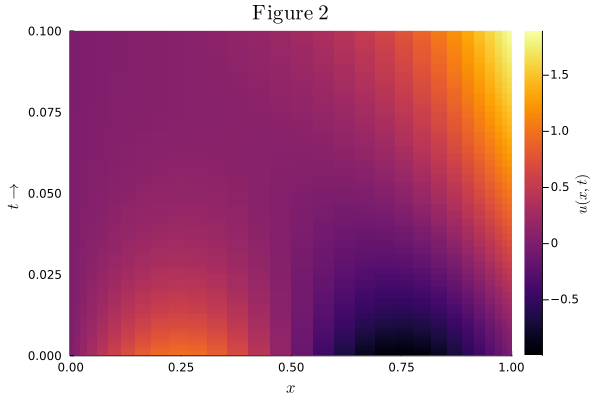

In [6]:
u = \([B;L],[u0;f;g;0];tolerance=1e-6)

fig2 = heatmap(u,xlabel=L"x",ylabel=L"t\to",cbartitle=L"u(x,t)",title=L"\textrm{Figure\ 2}",fmt=:png)
display(fig2)

This method doesn't give us a 1-D (marginal) function at some given time $t$. Rather, we get a 2-D function that can be interpolated in the entire extended domain $\Omega$.

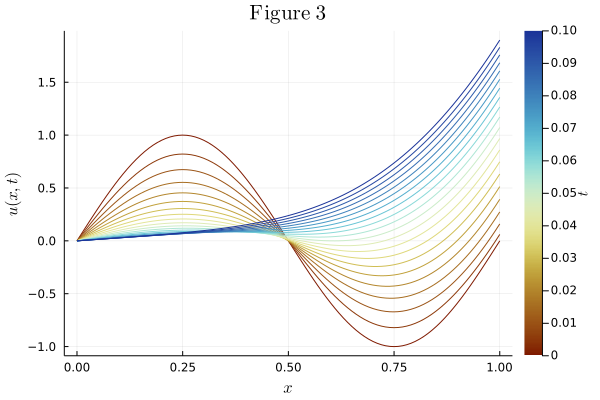

In [7]:
x = xl:0.01:xr
t = t0:0.005:tf

fig3 = plot(xlabel=L"x",ylabel=L"u(x,t)",title=L"\textrm{Figure\ 3}",legend=false,fmt=:png)
for τ ∈ t fig3 = plot!(x,u.(x,τ),line_z=τ,color=:roma,cbar=true,cbartitle=L"t") end
display(fig3)

It would be nice to use this solution for functions like:

128

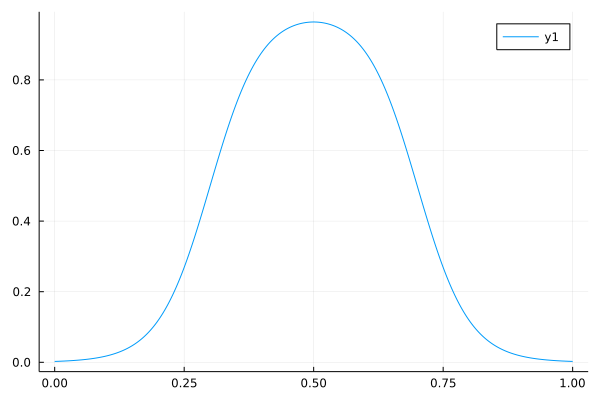

In [8]:
ϵ = 1e-1
h = Fun(x->(tanh((x-0.3)/ϵ)-tanh((x-0.7)/ϵ))/2,X)
display(ncoefficients(h))
plot(h,fmt=:png)

[Here's](https://github.com/JuliaApproximation/ApproxFun.jl/issues/763#issuecomment-1022081986) why this doesn't work (yet?).